# Spaceship titanic prediction

## 1. Load data


In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [38]:
df = pd.read_csv('data/train.csv')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


1. **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
2. **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
3. **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
4. **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
5. **Destination** - The planet the passenger will be debarking to.
Age - The age of the passenger.
6. **VIP** - Whether the passenger has paid for special VIP service during the voyage.
7. **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
8. **Name** - The first and last names of the passenger.
9. **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

## 2. EDA

In [101]:
df_titanic = df.copy()

In [41]:
df_titanic.shape # 8693 et 14 variables 

(8693, 14)

In [42]:
!jupyter nbextension enable --py widgetsnbextension


Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [18]:
from ydata_profiling import ProfileReport 

In [ ]:
profile = ProfileReport(df_titanic, title = 'Spaceship titanic report')
profile.to_notebook_iframe()
profile.to_file("spaceshiptitanic.html")

In [43]:
df_titanic.info() #7 variables de type objet, 6 de type float et la target booléen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


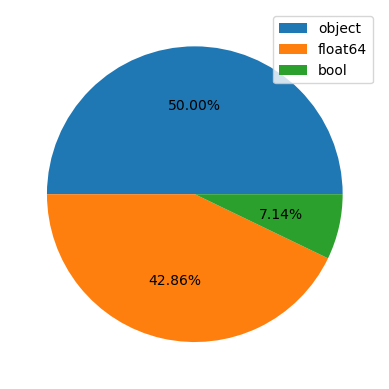

In [52]:
plt.pie(df_titanic.dtypes.value_counts(), autopct = '%1.2f%%')
legends = [f'{dtype}' for dtype in df_titanic.dtypes.value_counts().index]
plt.legend(legends)
plt.show()

On peut maintenant se poser des questions sur quel variable jour un rôle sur le fait d'avoir survecu ou pas 

In [55]:
import seaborn as sns 

Text(0, 0.5, 'Nombre de gens transportés')

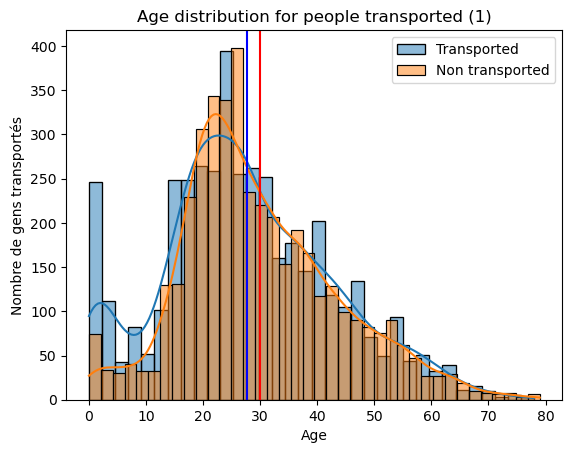

In [67]:
plt.figure()
sns.histplot(x = df_titanic['Age'][df_titanic['Transported'] == True], data=df_titanic, kde = True, label = 'Transported')
sns.histplot(x = df_titanic['Age'][df_titanic['Transported'] == False], data=df_titanic, kde = True, alpha =0.5, label = 'Non transported')
mean_transported = df_titanic['Age'][df_titanic['Transported'] == True].mean()
mean_nontransported = df_titanic['Age'][df_titanic['Transported'] == False].mean()
plt.axvline(mean_transported, color = 'blue')
plt.axvline(mean_nontransported, color = 'red')
plt.legend()
plt.title('Age distribution for people transported (1)')
plt.xlabel('Age')
plt.ylabel('Nombre de gens transportés')


In [75]:
crosstab = pd.crosstab(df_titanic['VIP'], df_titanic['Transported'])


Transported,False,True
VIP,,
False,4093,4198
True,123,76


<Axes: xlabel='VIP', ylabel='count'>

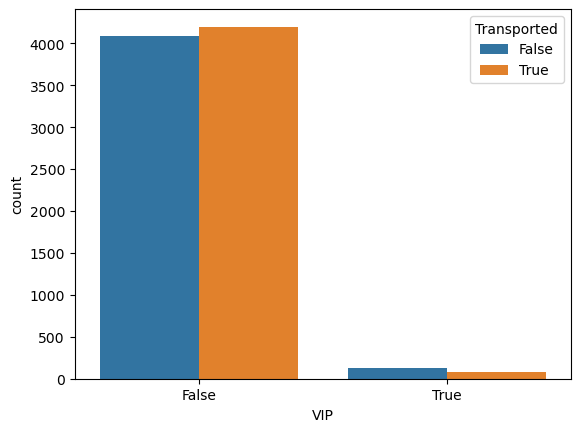

In [76]:
sns.countplot(data = df_titanic, hue = df_titanic.Transported, x = 'VIP') 

La personne étant VIP à l'air d'avoir plus de chance de survivre

Faisons la même analyse pour HomePlanet, CryoSleep , Cabin , Destination 

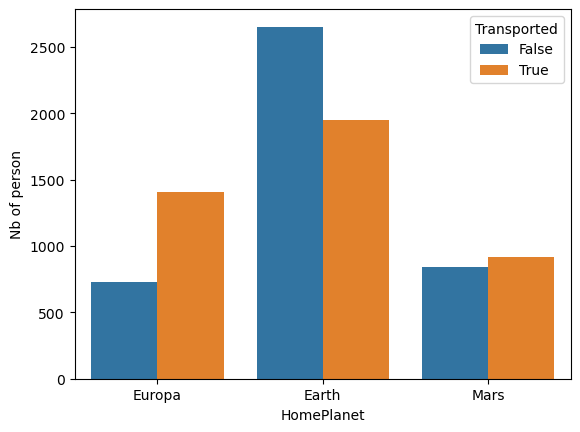

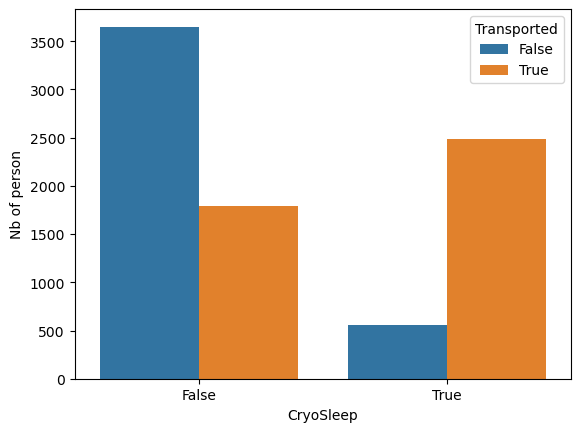

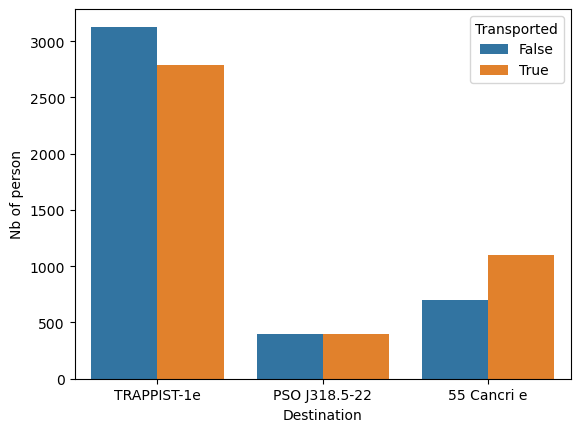

In [80]:
liste = ['HomePlanet', 'CryoSleep', 'Destination']

for element in liste : 
    plt.figure()
    sns.countplot(data = df_titanic, x = element, hue = 'Transported')
    plt.ylabel('Nb of person')

D'après les figures ci dessus on peut tirer plusieurs conclusions : 
1. Les personnes venant d'Europa ont été beaucoup plus transportées dans l'autre dimension. Ceux venant de la Terre il y a plus de gens non transportées ... Donc il y a quand même un lien
2. Ceux en cryosleep donc endormi dans leur cabine ont beaucoup beaucoup plus été transportés
3. enfin les personnes se dirigeant vers TRAPPIST-1e ont + survecu , l'inverse de 55 Cancri e

In [103]:
df_titanic['Cabin']
df_titanic[['deck','num','side']]= df_titanic['Cabin'].str.split('/', expand = True)


In [104]:
df_titanic

,PassengerId,HomePlanet,CryoSleep,Cabin,deck,num,side,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,A,98,P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,G,1499,S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,G,1500,S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,E,608,S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


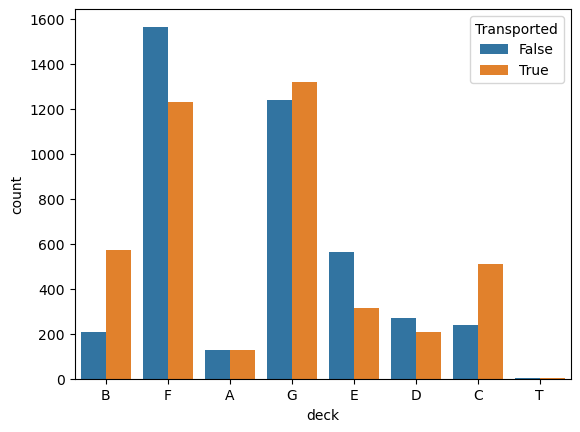

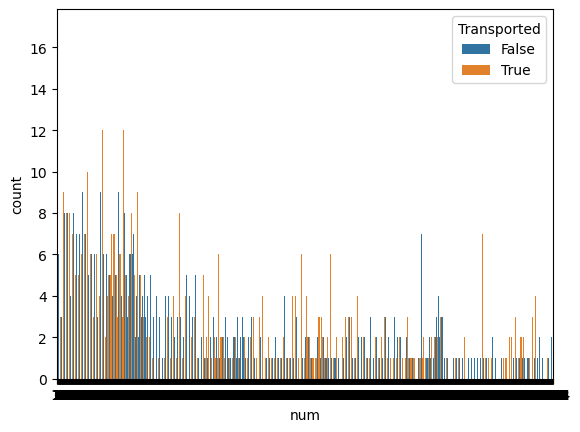

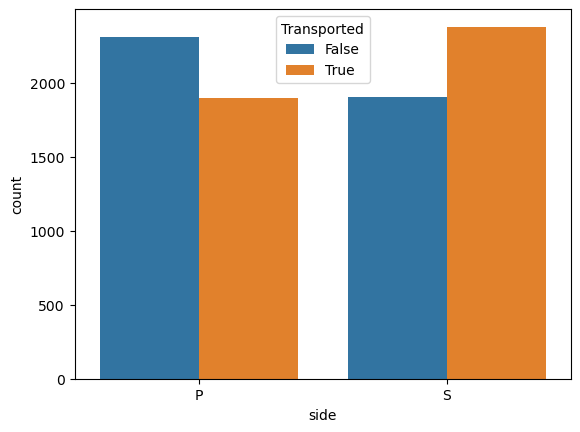

In [105]:
cabin = ['deck','num','side']
for element in cabin : 
    plt.figure()
    sns.countplot(data = df_titanic, x = element, hue = 'Transported')

On remarque que selon les cabines la chance de survit diffère, surtout pour ceux en P ils sont bcp moins transportés.

## 3. Data Preprocessing

In [127]:
df_titanic.drop(['PassengerId','Name'], axis = 1, inplace=True)

In [132]:
df_titanic['TotalExpense'] = df_titanic[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [134]:
df_titanic = df_titanic.drop(['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'], axis = 1)

In [135]:
df_titanic

,HomePlanet,CryoSleep,Cabin,deck,num,side,Destination,Age,VIP,Transported,TotalExpense
0,Europa,False,B/0/P,B,0,P,TRAPPIST-1e,39.0,False,False,0.0
1,Earth,False,F/0/S,F,0,S,TRAPPIST-1e,24.0,False,True,736.0
2,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,58.0,True,False,10383.0
3,Europa,False,A/0/S,A,0,S,TRAPPIST-1e,33.0,False,False,5176.0
4,Earth,False,F/1/S,F,1,S,TRAPPIST-1e,16.0,False,True,1091.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,A,98,P,55 Cancri e,41.0,True,False,8536.0
8689,Earth,True,G/1499/S,G,1499,S,PSO J318.5-22,18.0,False,False,0.0
8690,Earth,False,G/1500/S,G,1500,S,TRAPPIST-1e,26.0,False,True,1873.0
8691,Europa,False,E/608/S,E,608,S,55 Cancri e,32.0,False,False,4637.0


In [144]:
df_titanic.drop('Cabin', axis = 1, inplace= True)

In [146]:
df_titanic.dropna(inplace=True)

In [149]:
df_titanic.head()

,HomePlanet,CryoSleep,deck,num,side,Destination,Age,VIP,Transported,TotalExpense
0,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,False,0.0
1,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,True,736.0
2,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,False,10383.0
3,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,False,5176.0
4,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,True,1091.0
